# Datenanalyse mit KI & Machine Learning
## Ausreißer

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Wie können Ausreißer Daten beeinflussen?

In [2]:
numbers1 = [4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7]
print('Mittelwert:', round(np.mean(numbers1), 2))
print('Median:', np.median(numbers1))
print('Standardabweichung:', round(np.std(numbers1), 2))

Mittelwert: 5.45
Median: 5.0
Standardabweichung: 0.99


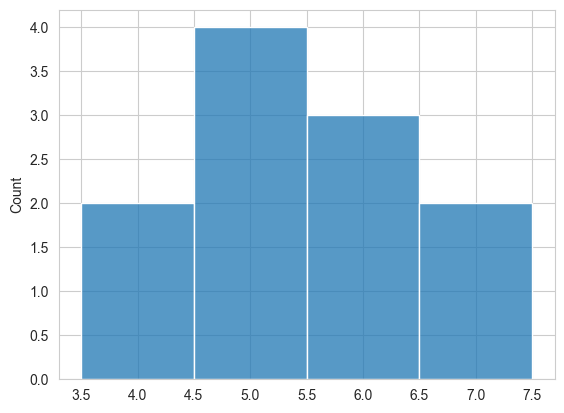

In [3]:
sns.histplot(numbers1, discrete=True);

In [4]:
numbers2 = [4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 300]
print('Mittelwert:', round(np.mean(numbers2), 2))
print('Median:', np.median(numbers2))
print('Standardabweichung:', round(np.std(numbers2), 2))

Mittelwert: 30.0
Median: 5.5
Standardabweichung: 81.41


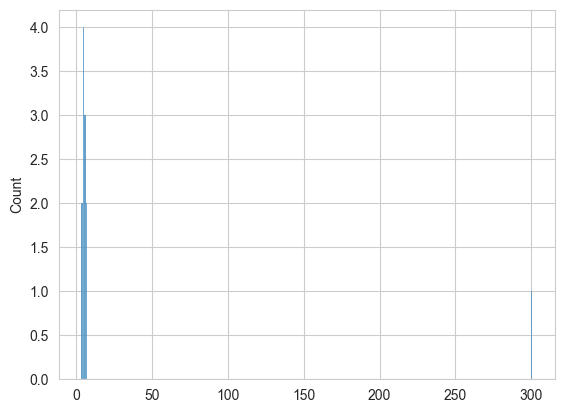

In [5]:
sns.histplot(numbers2, discrete=True);

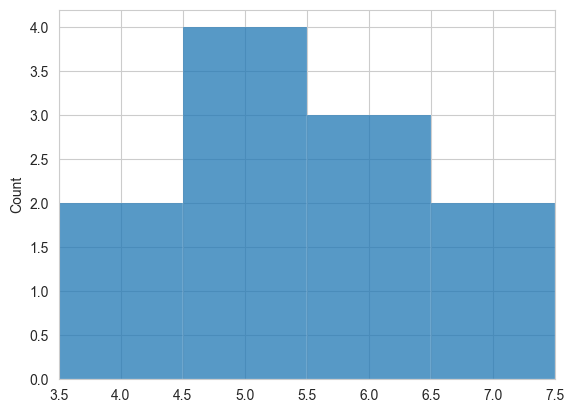

In [6]:
sns.histplot(numbers2, discrete=True)
plt.xlim(3.5, 7.5);

# Visuelle Darstellung von Ausreissern

In [7]:
# Quelle Dataset: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
df = pd.read_csv('heart_disease_uci.csv', index_col='id')
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
df['trestbps'].describe()  # die Null wäre wahrscheinlich auch zu entfernen.

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [9]:
df[df['trestbps'] == 0]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3


In [10]:
df.isna().sum().rename('null_count')

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
Name: null_count, dtype: int64

In [11]:
len(df)

920

In [12]:
len(df.dropna())

299

In [13]:
len(df.dropna(subset=['chol']))

890

In [14]:
df.dropna(subset=['chol'], inplace=True)

In [15]:
df.shape

(890, 15)

In [16]:
df.select_dtypes('object')

,sex,dataset,cp,fbs,restecg,exang,slope,thal
id,,,,,,,,
1,Male,Cleveland,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
2,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,normal
3,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
4,Male,Cleveland,non-anginal,False,normal,False,downsloping,normal
5,Female,Cleveland,atypical angina,False,lv hypertrophy,False,upsloping,normal
...,...,...,...,...,...,...,...,...
916,Female,VA Long Beach,asymptomatic,True,st-t abnormality,False,NaN,NaN
917,Male,VA Long Beach,typical angina,False,st-t abnormality,NaN,NaN,NaN
918,Male,VA Long Beach,asymptomatic,True,st-t abnormality,False,NaN,fixed defect


In [17]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,890.000000,834.000000,890.000000,838.000000,831.000000,308.000000,890.000000
mean,53.580899,132.089928,199.130337,137.539379,0.889290,0.678571,1.008989
std,9.389502,19.077093,110.780810,25.989709,1.095398,0.936378,1.145210
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


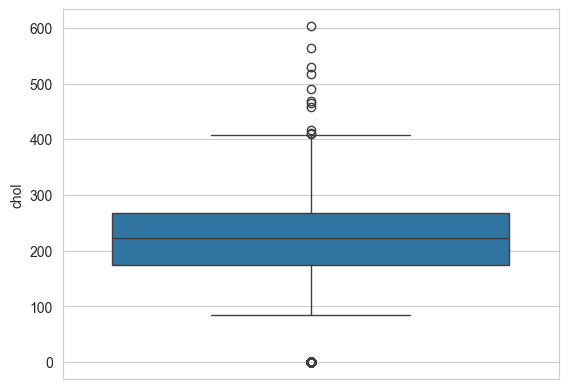

In [18]:
sns.boxplot(y=df['chol']);

In [19]:
len(df[df['chol'] == 0.0])

172

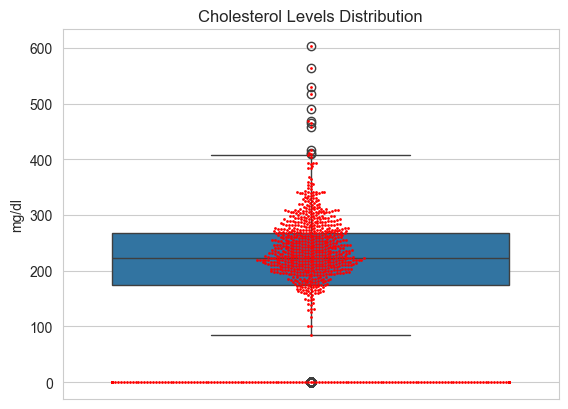

In [20]:
# Kombiniert mit Swarmplot, um die Verteilung noch deutlicher zu sehen:
sns.boxplot(y=df['chol'])
sns.swarmplot(y=df['chol'], size=2, color='red', marker='o')
plt.title("Cholesterol Levels Distribution")
plt.xlabel("")
plt.ylabel("mg/dl");

#### Boxplot berechnet die Quartile in unseren Daten und zeigt automatisch Ausreißer als Punkte jenseits der Whisker an. Wir haben in unseren Daten also ein paar Ausreißer oberhalb unserer Quartile und etliche unterhalb der Quartile auf der Null-Linie.

# Mathematische Berechnung

## 1. Methode: Interquartilsabstand

In [21]:
# Anhand unserer Daten berechnen wir die Quartile und damit den Interquartilsabstand. Alle Daten die sich unterhalb des ersten Quartils - 1,5 * Interquartilsabstand, bzw. über des dritten Quartils + 1,5*Interquartilsabstand befinden, werden als Ausreißer bezeichnet.

In [22]:
q1 = df['chol'].quantile(0.25)
print("Erstes Quartil:", q1)

Erstes Quartil: 175.0


In [23]:
q3 = df['chol'].quantile(0.75)
print("Drittes Quartil:", q3)

Drittes Quartil: 268.0


In [24]:
# Interquartilsabstand (IQR):
iqr = q3 - q1
iqr

np.float64(93.0)

In [25]:
lower_bound = q1 - 1.5*iqr
lower_bound

np.float64(35.5)

In [26]:
upper_bound = q3 + 1.5*iqr
upper_bound

np.float64(407.5)

#### Alle Punkte unserer chol Spalte unter 35.5 oder oberhalb von 407.5 stellen Ausreißer dar

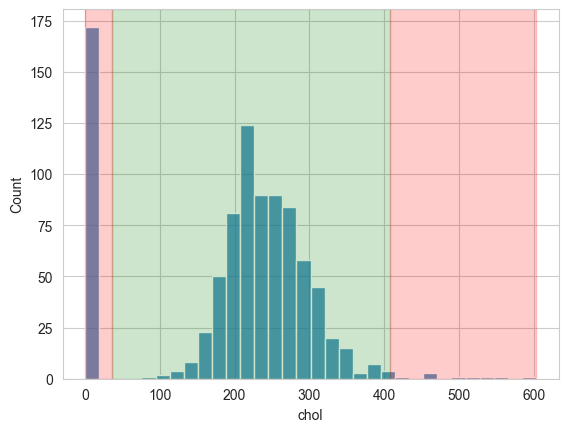

In [27]:
# Visuelle Darstellung der IQR-Methode:
sns.histplot(df['chol'])
plt.axvspan(xmin=lower_bound, xmax=upper_bound, color='green', alpha=0.2)
plt.axvspan(xmin=df['chol'].min(), xmax=lower_bound, color='red', alpha=0.2)
plt.axvspan(xmin=upper_bound, xmax=df['chol'].max(), color='red', alpha=0.2);

# Übungsaufgabe
### Schreibe eine Funktion, der du eine Spalte aus einem Datensatz geben kannst und die dir anschließend als Informationen Q1, Q3, IQR, untere Grenze, obere Grenze und die Anzahl der Ausreißer ausgibt.
#### Optional: Schreibe die Funktion so, dass diese Werte als Output der Funktion zurückgegeben werden.

In [28]:
def iqr_method(spalte):
    q1 = np.quantile(spalte, 0.25)
    q3 = np.quantile(spalte, 0.75)
    iqr_f = q3 - q1
    grenze_u_f = q1 - iqr_f * 1.5
    grenze_o_f = q3 + iqr_f * 1.5
    n_ausreisser = spalte[spalte > grenze_o_f].count() + spalte[spalte < grenze_u_f].count()
    return q1, q3, iqr_f, grenze_u_f, grenze_o_f, n_ausreisser

In [29]:
df.age.describe()['25%']

np.float64(47.0)

In [30]:
def iqr_method_2(series):
    ser_q1 = series['25%']
    ser_q3 = series['75%']
    ser_iqr = ser_q3 - ser_q1
    ser_lower_bound = ser_q1 - ser_iqr * 1.5
    ser_upper_bound = ser_q3 + ser_iqr * 1.5
    n_outliers = (series[series > ser_upper_bound]
                  + series[series < ser_lower_bound])
    
    return ser_q1, ser_q3, ser_iqr, ser_lower_bound, ser_upper_bound, n_outliers

In [31]:
q1, q3, iqr_f, grenze_u_f, grenze_o_f, n_ausreisser = iqr_method(df["chol"])

In [32]:
q1

np.float64(175.0)

In [33]:
n_ausreisser

np.int64(183)

## 2. Methode: Standardabweichung

In [34]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


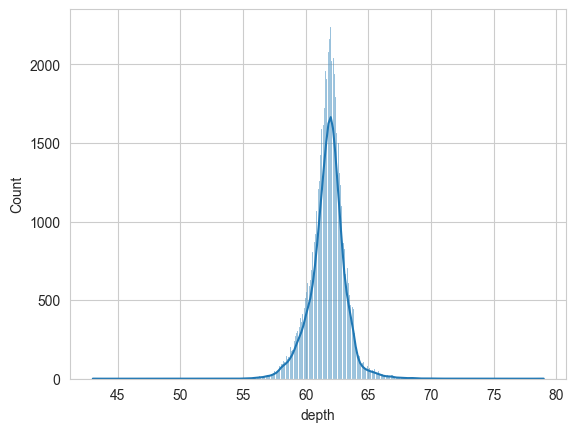

In [35]:
sns.histplot(diamonds['depth'], kde=True);

In [36]:
# Mittelwert:
depth_mean = diamonds['depth'].mean()
depth_mean

np.float64(61.749404894327036)

In [37]:
# Standardabweichung:
depth_std = diamonds['depth'].std()
depth_std

np.float64(1.432621318833661)

In [38]:
# Liegt eine Normalverteilung vor:

# z1 ermittelt die Anzahl aller Werte, die mehr als eine Standardabweichung über ODER unter dem Mittelwert liegen.
z1 = (diamonds['depth'][diamonds['depth'] > (depth_mean + depth_std)].count() 
    + diamonds['depth'][diamonds['depth'] < (depth_mean - depth_std)].count()) 

one_std = (len(diamonds) - z1) / len(diamonds)
print(f"In einer Standarbweichung liegen {one_std:.2%} der Werte.")

# z2 ermittelt die Anzahl aller Werte, die mehr als zwei Standardabweichungen über ODER unter dem Mittelwert liegen.
z2 = (diamonds['depth'][diamonds['depth'] > (depth_mean + 2*depth_std)].count() 
    + diamonds['depth'][diamonds['depth'] < (depth_mean - 2*depth_std)].count()) 

two_std = (len(diamonds) - z2) / len(diamonds)
print(f"In einer Standarbweichung liegen {two_std:.2%} der Werte.")

# z3 ermittelt die Anzahl aller Werte, die mehr als zwei Standardabweichungen über ODER unter dem Mittelwert liegen.
z3 = (diamonds['depth'][diamonds['depth'] > (depth_mean + 3*depth_std)].count() 
    + diamonds['depth'][diamonds['depth'] < (depth_mean - 3*depth_std)].count()) 

three_std = (len(diamonds) - z3) / len(diamonds)
print(f"In einer Standarbweichung liegen {three_std:.2%} der Werte.")

In einer Standarbweichung liegen 74.73% der Werte.
In einer Standarbweichung liegen 94.77% der Werte.
In einer Standarbweichung liegen 98.73% der Werte.


In [39]:
# Fazit: Wir behandeln die Verteilung wie eine Normalverteilung!

In [40]:
# Obere Grenze:
upper_bound_std = depth_mean + 3*depth_std
upper_bound_std

np.float64(66.04726885082802)

In [41]:
# Untere Grenze:
lower_bound_std = depth_mean - 3*depth_std
lower_bound_std

np.float64(57.45154093782605)

#### alle Punkte unserer depth Spalte unter 57.5 oder oberhalb von 66.1 stellen Ausreißer dar.

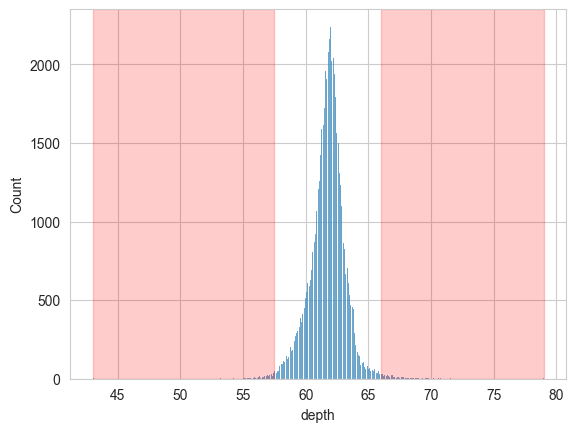

In [42]:
# Visuelle Darstellung der Standardabweichung-Methode
sns.histplot(diamonds['depth'])
plt.axvspan(xmin=diamonds['depth'].min(), xmax=lower_bound_std, color='red', alpha=0.2)
plt.axvspan(xmin=upper_bound_std, xmax=diamonds['depth'].max(), color='red', alpha=0.2);

In [43]:
# Anzahl an Ausreißern
outliers_count = (diamonds[diamonds['depth'] > upper_bound_std].shape[0] 
                  + diamonds[diamonds['depth'] < lower_bound_std].shape[0])

print('Anzahl Ausreißer:', outliers_count)

outliers_proportion = outliers_count / len(diamonds)

print('Prozent an Ausreißern:', format(outliers_proportion, '.3%'))

Anzahl Ausreißer: 685
Prozent an Ausreißern: 1.270%


# Verfahren mit Ausreißern

## 1. Methode: Trimming (Entfernen)

In [44]:
# Unsere Cholesteroldaten bestanden zu einem großen Teil aus 0. 
# Ein Wert von 0 mg/dl Cholesterol können wir als Messfehler betrachten und deshalb aus unseren Daten entfernen

In [45]:
df_trimmed = df[df['chol'] > 0]
df_trimmed.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [46]:
# Werte vor dem Trimmen (aus ungetrimmten Datensatz):
print(q1)
print(q3)

175.0
268.0


In [47]:
# Quartile bei getrimmtem Datensatz:
q1_trimmed = df_trimmed['chol'].quantile(0.25)
q3_trimmed = df_trimmed['chol'].quantile(0.75)
print("Erstes Quartil:", q1_trimmed)
print("Drittes Quartil:", q3_trimmed)

Erstes Quartil: 210.0
Drittes Quartil: 276.75


In [48]:
# IQR vor dem Trimmen (aus ungetrimmten Datensatz):
iqr

np.float64(93.0)

In [49]:
# Interquartilsabstand bei getrimmtem Datensatz:
iqr_trimmed = q3_trimmed - q1_trimmed
iqr_trimmed

np.float64(66.75)

In [50]:
# Grenzen vor dem Trimmen (aus ungetrimmten Datensatz):
print("Untergrenze:", lower_bound)
print("Obergrenze:", upper_bound)

Untergrenze: 35.5
Obergrenze: 407.5


In [51]:
# Nach dem Trimmen:
lower_bound_trimmed = q1_trimmed - 1.5*iqr_trimmed
lower_bound_trimmed

np.float64(109.875)

In [52]:
# Nach dem Trimmen:
upper_bound_trimmed = q3_trimmed + 1.5*iqr_trimmed
upper_bound_trimmed

np.float64(376.875)

#### Alle Punkte unserer neuen chol Spalte unter 109.9 oder oberhalb von 376.9 stellen Ausreißer dar

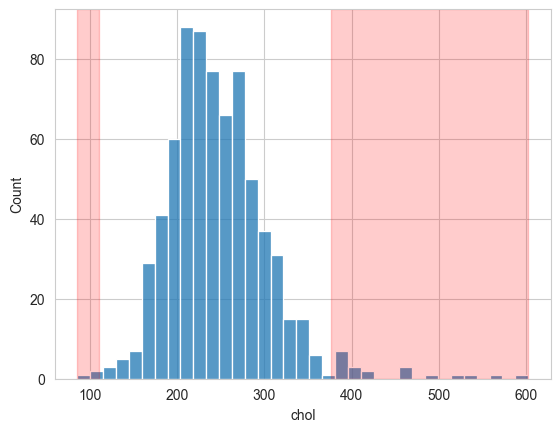

In [53]:
# Ausreißer nach Entfernung der 0:
sns.histplot(df_trimmed["chol"])
plt.axvspan(xmin=df_trimmed["chol"].min(), xmax=lower_bound_trimmed, color="red", alpha=0.2)
plt.axvspan(xmin=upper_bound_trimmed, xmax=df_trimmed["chol"].max(), color="red", alpha=0.2)
plt.show()

In [54]:
df_no_outliers = df_trimmed[df_trimmed['chol'].between(lower_bound_trimmed, upper_bound_trimmed, inclusive='both')]

<Axes: xlabel='chol', ylabel='Count'>

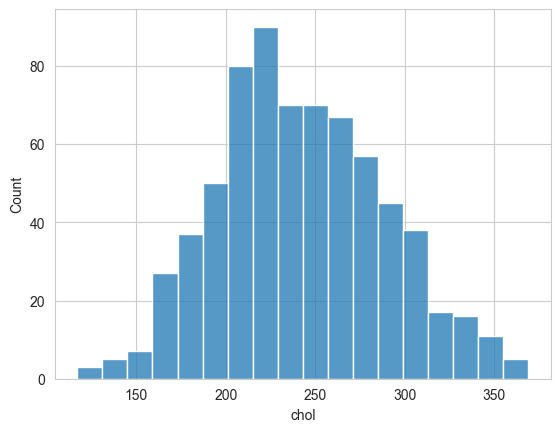

In [55]:
sns.histplot(df_no_outliers['chol'])

## 2. Methode: Capping

In [56]:
# Gehen wir davon aus, dass die depth unserer Diamanten ab einem bestimmten Schwellenwert keine Bedeutung mehr hat. Ab einer bestimmten depth hat der Wert also keinen größeren Einfluss mehr auf z.B. den Preis
# Dann hilft uns Capping

In [57]:
diamonds_capped = diamonds.copy()

In [58]:
upper_bound_std

np.float64(66.04726885082802)

In [59]:
lower_bound_std

np.float64(57.45154093782605)

In [60]:
diamonds_capped['depth'].sort_values(ascending=False)

52861    79.0
52860    79.0
41918    78.2
46679    73.6
53540    72.9
         ... 
36503    51.0
16857    50.8
6341     44.0
10377    43.0
4518     43.0
Name: depth, Length: 53940, dtype: float64

In [61]:
# Ersetzt alle Werte mehr als drei Standardabweichungen über dem Mittelwert mit Obergrenze von einer STD: 

In [62]:
diamonds_capped['depth_capped'] = diamonds_capped['depth'].apply(lambda x: upper_bound_std if x > upper_bound_std 
                               else x)

In [63]:
diamonds_capped['depth_capped'].sort_values(ascending=False)

2177     66.047269
46449    66.047269
10936    66.047269
13002    66.047269
40771    66.047269
           ...    
36503    51.000000
16857    50.800000
6341     44.000000
10377    43.000000
4518     43.000000
Name: depth_capped, Length: 53940, dtype: float64

In [64]:
diamonds_capped['depth_capped'].max()

np.float64(66.04726885082802)

In [65]:
# Zur Erinnerung:
diamonds_capped['depth'].max()

np.float64(79.0)

In [66]:
# Ersetzt alle Werte mehr als drei Standardabweichungen unter dem Mittelwert durch lower_bound_STD:
diamonds_capped['depth_capped'] = diamonds_capped['depth_capped'].apply(lambda x: lower_bound_std if x < lower_bound_std else x)

In [67]:
diamonds_capped['depth'].min()

np.float64(43.0)

In [68]:
# Ursprünglicher Mittelwert:
depth_mean

np.float64(61.749404894327036)

In [69]:
# Mittelwert nach Winsorisierung:
depth_capped_mean = diamonds_capped['depth_capped'].mean()
depth_capped_mean

np.float64(61.74596851981033)

In [75]:
# Ursprüngliche Standardabweichung:
depth_std

np.float64(1.432621318833661)

In [78]:
depth_capped_std = diamonds_capped['depth_capped'].std()
depth_capped_std

np.float64(1.3627892095093164)

In [80]:
# Ursprüngliche Untergrenze nach Entfernen der 0-Werte in depth:
lower_bound_std

np.float64(57.45154093782605)

In [82]:
lower_bound_capped = depth_capped_mean - 3*depth_capped_std
lower_bound_capped

np.float64(57.657600891282385)

In [83]:
# Ursprüngliche Obergrenze nach Entfernen der 0-Werte in depth:
upper_bound_std

np.float64(66.04726885082802)

In [85]:
upper_bound_capped = depth_capped_mean + 3*depth_capped_std
upper_bound_capped

np.float64(65.83433614833828)

#### Alle Punkte unserer depth Spalte unter 57.6 oder oberhalb von 65.8 stellen Ausreißer dar

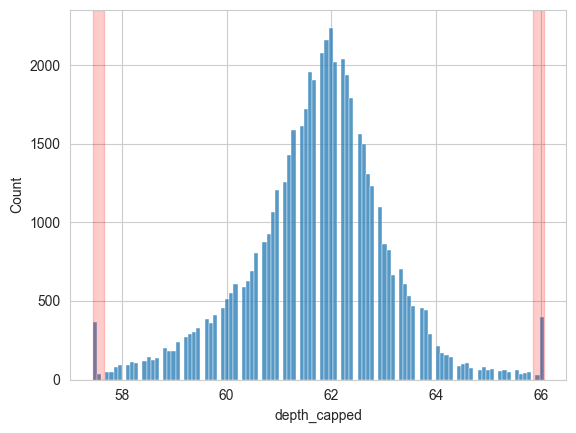

In [88]:
# Visuelle Darstellung der Standardabweichung-Methode
sns.histplot(diamonds_capped['depth_capped'])
plt.axvspan(xmin=diamonds_capped['depth_capped'].min(), xmax=lower_bound_capped,
            color='red', alpha=0.2)
plt.axvspan(xmin=upper_bound_capped, xmax=diamonds_capped['depth_capped'].max(),
            color='red', alpha=0.2);

### Kleiner Exkurs zu Dummy-Codierung von Variablen (Feature Engineering!)

In [89]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [90]:
df.select_dtypes('number')

,age,trestbps,chol,thalch,oldpeak,ca,num
id,,,,,,,
1,63,145.0,233.0,150.0,2.3,0.0,0
2,67,160.0,286.0,108.0,1.5,3.0,2
3,67,120.0,229.0,129.0,2.6,2.0,1
4,37,130.0,250.0,187.0,3.5,0.0,0
5,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...
916,54,127.0,333.0,154.0,0.0,NaN,1
917,62,NaN,139.0,NaN,NaN,NaN,0
918,55,122.0,223.0,100.0,0.0,NaN,2


In [100]:
# Bei Geschlecht ist es super einfach, auch mit unseren Standardmitteln:
sex_dict = {'Female': 0, 'Male': 1}
df['sex_binary'] = df['sex'].map(sex_dict)

In [117]:
df['sex_binary']

id
1      1
2      1
3      1
4      1
5      0
      ..
916    0
917    1
918    1
919    1
920    1
Name: sex_binary, Length: 888, dtype: int64

In [101]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,sex_binary
id,,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,1
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,1
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [103]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [104]:
df.dropna(subset=['restecg'], inplace=True)

In [105]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [73]:
# Keine gute Idee:
# {... : 0, ...: 1, ...: 2, (...) ...: 120}

In [107]:
# Bei get_dummies kann eine Spalte immer weggelassen werden ohne Informationsverlust: 
restecg_dummies = pd.get_dummies(df['restecg'])
restecg_dummies

,lv hypertrophy,normal,st-t abnormality
id,,,
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False
5,True,False,False
...,...,...,...
916,False,False,True
917,False,False,True
918,False,False,True


In [108]:
df['restecg']

id
1        lv hypertrophy
2        lv hypertrophy
3        lv hypertrophy
4                normal
5        lv hypertrophy
             ...       
916    st-t abnormality
917    st-t abnormality
918    st-t abnormality
919      lv hypertrophy
920      lv hypertrophy
Name: restecg, Length: 888, dtype: object

In [110]:
df.shape

(888, 16)

In [111]:
df_with_dummies = pd.concat([df, restecg_dummies], axis=1)
df_with_dummies

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,sex_binary,lv hypertrophy,normal,st-t abnormality
id,,,,,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,1,True,False,False
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,True,False,False
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,True,False,False
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,1,False,True,False
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1,0,False,False,True
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0,1,False,False,True
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2,1,False,False,True


In [114]:
pd.get_dummies(df['restecg']).drop('st-t abnormality', axis=1)

,lv hypertrophy,normal
id,,
1,True,False
2,True,False
3,True,False
4,False,True
5,True,False
...,...,...
916,False,False
917,False,False
918,False,False


In [116]:
# Man kann weglassen und lässt auch in der Praxis eine Spalte weg:
pd.get_dummies(df['restecg'], drop_first=True)
# Warum?

,normal,st-t abnormality
id,,
1,False,False
2,False,False
3,False,False
4,True,False
5,False,False
...,...,...
916,False,True
917,False,True
918,False,True


In [ ]:
# Diese Kombinationen sind möglich:
# 1 0 0
# 0 1 0
# 0 0 1

# Diese Kombinationen gibt es nach Entfernung einer Spalte:
# 1 0
# 0 1
# 0 0

# Für unseren ML-Algorithmus sind alle drei Variablen weiterhin
# gut unterscheidbar durch diese Kombinationen.
# Also darf man eine Spalte grundsätzlich wegwerfen.

# Warum sollte man das überhaupt tun?
# 1. Reduziert den Umfang der Daten in der Tabelle. Gerade bei großen Datenmengen wichtig!
# 2. Beschleunigt auch das Training des Modells.

In [ ]:
# In Scikit-Learn gibt es für dieselbe Sache den OneHotEncoder.